## Prerequisites

In [42]:
!pip install typing_extensions==4.7.1 --upgrade
!pip install typing

You should consider upgrading via the 'c:\users\ashington\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\ashington\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [25]:
!pip install langgraph

You should consider upgrading via the 'c:\users\ashington\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [26]:
!pip install langsmith

You should consider upgrading via the 'c:\users\ashington\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [27]:
!pip install langchain langchain_groq langchain_community

You should consider upgrading via the 'c:\users\ashington\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [1]:
groq_api_key = "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"
langsmith = "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"

In [2]:
import os
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "CourseLangGraph"
os.environ["LANGCHAIN_API_KEY"] = langsmith

In [3]:
from langchain_groq import ChatGroq

## Creating LLM

In [4]:
llm = ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")

In [5]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000023335A61460>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000023335A6B070>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

## Start Building chatbot using langgraph

In [15]:
from typing import Annotated
import typeddict
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [16]:
class State(TypedDict):
    """
    Messages have the type list.
    The add_messages function in the annotation defines how this state key should be updated.
    In this case it appends messges to the list, rather than overwriting them
    """
    messages:Annotated[list,add_messages]

graph_builder = StateGraph(State)

In [17]:
graph_builder

In [18]:
def chatbot(state:State):
    return {"messages":llm.invoke(state['messages'])}
    

In [19]:
graph_builder.add_node("chatbot",chatbot)

In [20]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [23]:
graph = graph_builder.compile()

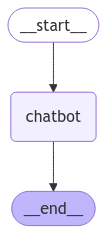

In [24]:
from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [25]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit","q"]:
        print("Goodbye!")
        break
    for event in graph.stream({'messages':("user",user_input)}):
        print(event.values())
        for value in event.values():
            print(value['messages'])
            print("Assistant:",value["messages"].content)

dict_values([{'messages': AIMessage(content='Hello! 👋 How can I help you today?\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 10, 'total_tokens': 23, 'completion_time': 0.023636364, 'prompt_time': 4e-07, 'queue_time': 0.023525579999999997, 'total_time': 0.023636764}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-3aec4b00-e662-45b4-96bf-d3fdf596c702-0', usage_metadata={'input_tokens': 10, 'output_tokens': 13, 'total_tokens': 23})}])
content='Hello! 👋 How can I help you today?\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 10, 'total_tokens': 23, 'completion_time': 0.023636364, 'prompt_time': 4e-07, 'queue_time': 0.023525579999999997, 'total_time': 0.023636764}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-3aec4b00-e662-45b4-96bf-d